In [4]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
tf.disable_v2_behavior()
def add_layer(inputs,in_size,out_size,activation_funiction=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size]) +0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_funiction is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_funiction(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5 +noise
 
xs = tf.placeholder(tf.float32,[None,1])   
ys = tf.placeholder(tf.float32,[None,1])
 
#add hidden layer
l1 = add_layer(xs,1,10,activation_funiction=tf.nn.relu)
#add output layer
prediction = add_layer(l1,10,1,activation_funiction=None)
 
#the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
init =tf.initialize_all_variables()


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.global_variables_initializer` instead.


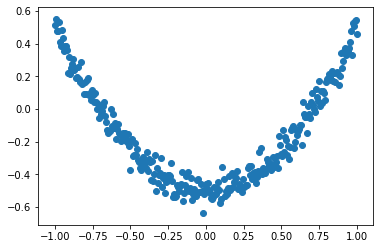

0.3625078
0.008102255
0.007447146
0.006841276
0.0062457896
0.0056587975
0.005115539
0.004633805
0.0041922443
0.0039284164
0.0037052704
0.0035361107
0.0033967304
0.003271
0.0031884324
0.0031266138
0.0030906613
0.0030623395
0.0030392564
0.0030204619


In [11]:
with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data,y_data)
    plt.ion()   #将画图模式改为交互模式
    for i in range(1000):
        sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
        if i%50 ==0:
            plt.pause(0.1)
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction,feed_dict={xs:x_data})
            lines = ax.plot(x_data,prediction_value,'r-',lw=5)
            plt.show()
            print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
    plt.ioff()
    